<h1>Encontrando esquinas</h1>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Cargar imagen
image = cv2.imread('crucigrama.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

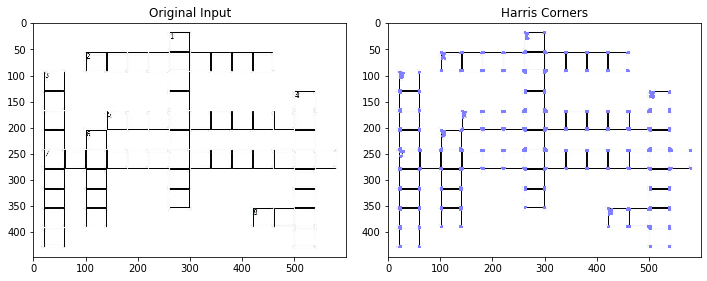

In [3]:
temp_output = image.copy()

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()
 
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Input')
cv2.imwrite('input.jpg', image)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#Utilizamos dilation en los puntos de las esquinas para agrandarlos
kernel = np.ones((3,3),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 1)

# Threshold para un valor optimo
temp_output[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

axs[1].imshow(cv2.cvtColor(temp_output, cv2.COLOR_BGR2RGB))
axs[1].set_title('Harris Corners')
cv2.imwrite('harris_corners.jpg', temp_output)

plt.show()

<b>cv2.cornerHarris(input image, block size, ksize, k)</b>
<ul>
<li>Input image - Tiene que estar en escala de grises y ser un float32.</li>
<li>blockSize - El tamaño del vecino es considerado para la detección de esquinas.</li>
<li>ksize - aperture parameter of Sobel </li>
<li>k - harris detector free parameter in the equation</li>
<li>Output – array de la ubicación de la esquina (x,y)</li>

Mejor metodo de detección de esquinas

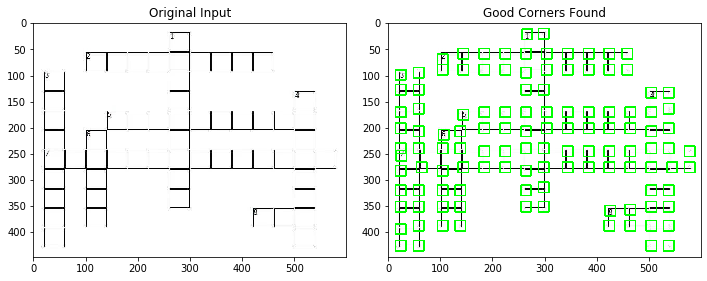

In [6]:

temp_output = image.copy()

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()
 
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Input')
cv2.imwrite('input.jpg', image)

# Especificamos que queremos las top 120 esquinas.
corners = cv2.goodFeaturesToTrack(gray, 120, 0.01, 15)

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(temp_output,(x-10,y-10),(x+10,y+10),(0,255,0), 2)

axs[1].imshow(cv2.cvtColor(temp_output, cv2.COLOR_BGR2RGB))
axs[1].set_title('Good Corners Found')
cv2.imwrite('good_corners_found.jpg', temp_output)

plt.show()

<b>cv2.goodFeaturesToTrack(input image, maxCorners, qualityLevel, minDistance)</b>

<ul>

<li>Input Image - 8-bit o floating-point 32-bit, single-channel image.</li>
<li>maxCorners – Número maximo de esquinas para return.</li>
<li>qualityLevel – Parametro especificando el minimo de calidad aceptado para las imagenes de las esquinas.</li>
<li>minDistance – Minimo posible Euclideano de distancia entre esquinas.</li>